In [3]:
#Solemne 1 Minería de Datos 2024
#Matías Tobar Toledo

In [2]:
from google.cloud import bigquery
import matplotlib.pyplot as plt


In [3]:
#create a client to connect to the BigQuery API
client = bigquery.Client()

In [4]:
#referencia a la base de datos
dataref = client.dataset("covid19_nyt", project="bigquery-public-data")
#api request
dataset = client.get_dataset(dataref)

In [5]:
#lista de tablas en la base de datos covid19_nyt
tables = list(client.list_tables(dataset))
#print nombre de las tablas
for table in tables:
    print(table.table_id)

excess_deaths
mask_use_by_county
us_counties
us_states


In [8]:
#construir referencia a la tabla
tableref = dataset.table("excess_deaths")
#api request
table = client.get_table(tableref)

In [9]:
#print informacion de las columnas de la tabla excess_deaths
table.schema

[SchemaField('country', 'STRING', 'NULLABLE', None, 'The country reported', (), None),
 SchemaField('placename', 'STRING', 'NULLABLE', None, 'The place in the country reported', (), None),
 SchemaField('frequency', 'STRING', 'NULLABLE', None, 'Weekly or monthly, depending on how the data is recorded', (), None),
 SchemaField('start_date', 'DATE', 'NULLABLE', None, 'The first date included in the period', (), None),
 SchemaField('end_date', 'DATE', 'NULLABLE', None, 'The last date included in the period', (), None),
 SchemaField('year', 'STRING', 'NULLABLE', None, 'Year reported', (), None),
 SchemaField('month', 'INTEGER', 'NULLABLE', None, 'Numerical month', (), None),
 SchemaField('week', 'INTEGER', 'NULLABLE', None, 'Epidemiological week, which is a standardized way of counting weeks to allow for year-over-year comparisons. Most countries start epi weeks on Mondays, but others vary', (), None),
 SchemaField('deaths', 'INTEGER', 'NULLABLE', None, 'The total number of confirmed deaths

In [11]:
#previsualizar las primeras filas de la tabla
client.list_rows(table, max_results=5).to_dataframe()

,country,placename,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
0,India,Mumbai,monthly,NaT,NaT,2020,1,<NA>,8397,8360,37,2019 historical data
1,India,Mumbai,monthly,NaT,NaT,2020,2,<NA>,7116,7797,-681,2019 historical data
2,India,Mumbai,monthly,NaT,NaT,2020,3,<NA>,6692,7155,-463,2019 historical data
3,India,Mumbai,monthly,NaT,NaT,2020,4,<NA>,7092,6752,340,2019 historical data
4,India,Mumbai,monthly,NaT,NaT,2020,5,<NA>,13833,7335,6498,2019 historical data


In [65]:
#previsualizar las primeras (100) entradas de la columna 'country'
#client.list_rows(table, selected_fields=table.schema[:1], max_results=100).to_dataframe()

client.list_rows(table, selected_fields=table.schema, max_results=100).to_dataframe()

,country,placename,frequency,start_date,end_date,year,month,week,deaths,expected_deaths,excess_deaths,baseline
0,India,Mumbai,monthly,NaT,NaT,2020,1,<NA>,8397,8360,37,2019 historical data
1,India,Mumbai,monthly,NaT,NaT,2020,2,<NA>,7116,7797,-681,2019 historical data
2,India,Mumbai,monthly,NaT,NaT,2020,3,<NA>,6692,7155,-463,2019 historical data
3,India,Mumbai,monthly,NaT,NaT,2020,4,<NA>,7092,6752,340,2019 historical data
4,India,Mumbai,monthly,NaT,NaT,2020,5,<NA>,13833,7335,6498,2019 historical data
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Italy,None,monthly,NaT,NaT,2015-2019 average,11,<NA>,51462,<NA>,<NA>,None
96,Indonesia,Jakarta,monthly,NaT,NaT,2019,1,<NA>,2783,<NA>,<NA>,None
97,Indonesia,Jakarta,monthly,NaT,NaT,2019,2,<NA>,2934,<NA>,<NA>,None
98,Indonesia,Jakarta,monthly,NaT,NaT,2019,3,<NA>,3153,<NA>,<NA>,None


In [13]:
query = """
        SELECT deaths, expected_deaths, excess_deaths
        FROM `bigquery-public-data.covid19_nyt.excess_deaths`
        WHERE country = 'Chile'
        """

dry_run_config = bigquery.QueryJobConfig(dry_run=True)
dry_run_query_job = client.query(query, job_config=dry_run_config)
print("This query will process {} bytes.".format(dry_run_query_job.total_bytes_processed))

This query will process 150633 bytes.


In [14]:
#ejecutar la consulta
query_job = client.query(query)

In [15]:
#corre la query y convierte el resultado en un dataframe
Chile_deaths = query_job.to_dataframe()

In [16]:
#tabla con información de muertes en Chile
Chile_deaths

,deaths,expected_deaths,excess_deaths
0,1888,<NA>,<NA>
1,1852,<NA>,<NA>
2,1792,<NA>,<NA>
3,1812,<NA>,<NA>
4,1875,<NA>,<NA>
...,...,...,...
300,2235,2007,228
301,2166,2000,166
302,2205,1995,210
303,2186,1992,194


<Axes: xlabel='deaths', ylabel='expected_deaths'>

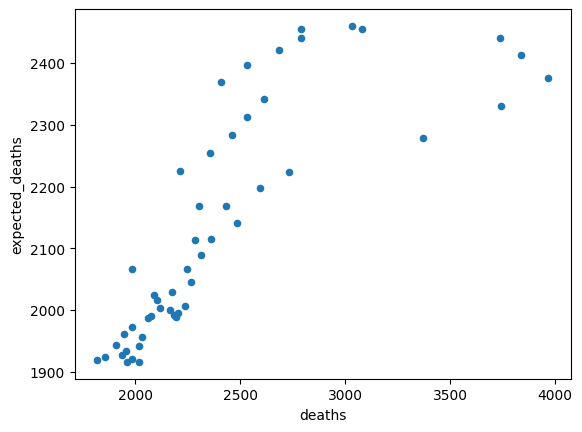

In [17]:
#gráfico de exploración
Chile_deaths.plot(x='deaths', y='expected_deaths', kind='scatter')

In [18]:
query = """
        SELECT placename, month,week, deaths, expected_deaths, excess_deaths
        FROM `bigquery-public-data.covid19_nyt.excess_deaths`
        WHERE country = 'Chile' AND year ='2020'
        """

dry_run_config = bigquery.QueryJobConfig(dry_run=True)
dry_run_query_job = client.query(query, job_config=dry_run_config)
print("This query will process {} bytes.".format(dry_run_query_job.total_bytes_processed))

This query will process 313853 bytes.


In [19]:
#ejecutar la consulta
query_job = client.query(query)


In [20]:
Chile_2020 = query_job.to_dataframe()
Chile_2020

,placename,month,week,deaths,expected_deaths,excess_deaths
0,None,1,2,2118,2004,114
1,None,1,3,2059,1987,72
2,None,1,4,1987,1972,15
3,None,2,5,2034,1957,77
4,None,2,6,1910,1944,-34
5,None,2,7,1955,1933,22
6,None,2,8,1856,1924,-68
7,None,3,9,1819,1919,-100
8,None,3,10,2019,1916,103
9,None,3,11,1963,1916,47


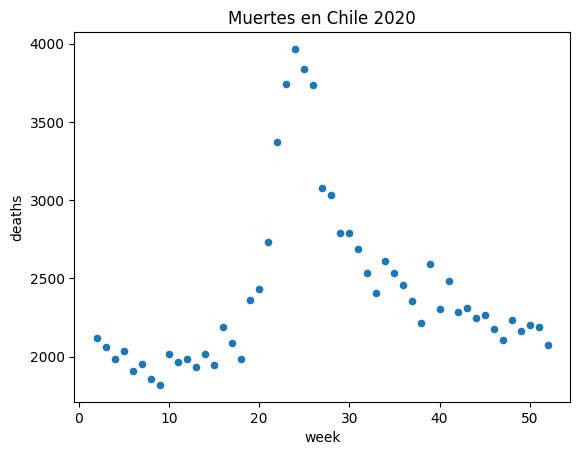

In [111]:
plot = Chile_2020.plot(x='week', y='deaths', kind='scatter', title='Muertes en Chile 2020')

Gráfico de linea que muestra la cantidad de muertes registradas en la base de datos relacionada al Covid-19 del New York Times {bigquery-public-data.covid19_nyt}.

Este gráfico muestra las muertes por cualquier causa en Chile durante el año 2020. 
Se puede ver una fuerte alza en muertes al rededor de la semana 25, que corresponden al mes de Junio.


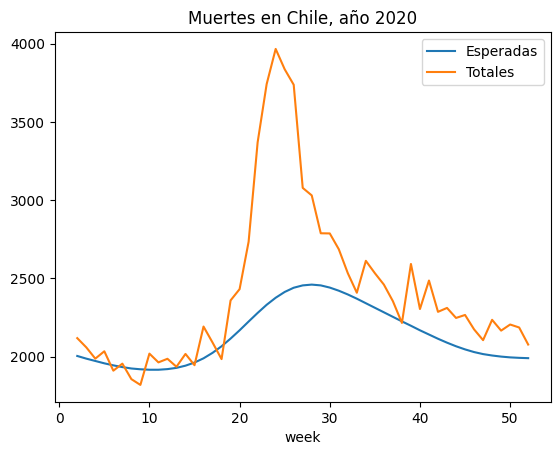

In [59]:
ax = Chile_2020.plot(x='week', y='expected_deaths', kind='line', label='Esperadas')
Chile_2020.plot(x='week', y='deaths', kind='line', label='Totales', ax=ax)

plt.title('Muertes en Chile, año 2020')
plt.legend()  # To display legend
plt.show()  # To display the plot


In [7]:
query = """
        SELECT year, week, SUM(deaths) as total_deaths, SUM(expected_deaths) as total_expected_deaths, SUM(excess_deaths) as total_excess_deaths
        FROM `bigquery-public-data.covid19_nyt.excess_deaths`
        WHERE country = 'Chile' GROUP BY year, week
        """

dry_run_config = bigquery.QueryJobConfig(dry_run=True)
dry_run_query_job = client.query(query, job_config=dry_run_config)
print("This query will process {} bytes.".format(dry_run_query_job.total_bytes_processed))

This query will process 252351 bytes.


In [8]:
query_job = client.query(query)


In [9]:
#API request - query to datagframe
Chile_years = query_job.to_dataframe()
Chile_years

,year,week,total_deaths,total_expected_deaths,total_excess_deaths
0,2015,2,1888,<NA>,<NA>
1,2015,3,1852,<NA>,<NA>
2,2015,4,1792,<NA>,<NA>
3,2015,5,1812,<NA>,<NA>
4,2015,6,1875,<NA>,<NA>
...,...,...,...,...,...
300,2020,48,2235,2007,228
301,2020,49,2166,2000,166
302,2020,50,2205,1995,210
303,2020,51,2186,1992,194


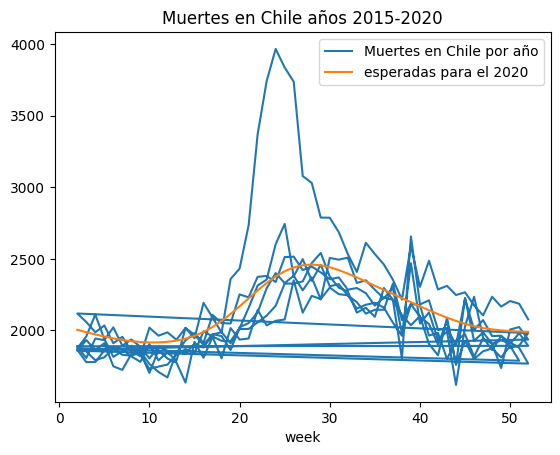

In [12]:
ax = Chile_years.plot(x='week', y='total_deaths', kind = 'line', label='Muertes en Chile por año')
Chile_years.plot(x='week', y='total_expected_deaths', kind = 'line',label='esperadas para el 2020', ax=ax)

plt.title('Muertes en Chile años 2015-2020')
plt.legend()  # To display legend
plt.show()  # To display the plot


El gráfico de arriba muestra las muertes registradas por semana, donde cada línea corresponde a cada año para años desde el 2015 al 2020.

Se puede notar una clara tendencia a lo largo de los años en torno a las 25-30 semanas, la cual parece estar bien representada por la curva de muertes esperadas para el año 2020. Sin embargo, el peak que más sobresale corresponde a las muertes reales de tal año, por lo que hay una importante diferencia en torno a lo esperado y lo cuantificado.